<h2>Data Analysis on  Diabetes</h2>

In [22]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression



In [23]:
#data acquisation
diabetes_data = pd.read_csv("diabetes.csv")

In [24]:
 #reading the first five rows
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35,0,33.6,0.627,50,1
1,1.0,85,66,29,0,26.6,0.351,31,0
2,8.0,183,64,0,0,23.3,0.672,32,1
3,1.0,89,66,23,94,28.1,0.167,21,0
4,0.0,137,40,35,168,43.1,2.288,33,1


In [25]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [26]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35,0,33.6,0.627,50,1
1,1.0,85,66,29,0,26.6,0.351,31,0
2,8.0,183,64,0,0,23.3,0.672,32,1
3,1.0,89,66,23,94,28.1,0.167,21,0
4,0.0,137,40,35,168,43.1,2.288,33,1


In [27]:
diabetes_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10.0,101,76,48,180,32.9,0.171,63,0
764,2.0,122,70,27,0,36.8,0.340,27,0
765,5.0,121,72,23,112,26.2,0.245,30,0
766,1.0,126,60,0,0,30.1,0.349,47,1
767,1.0,93,70,31,0,30.4,0.315,23,0


In [28]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


In [29]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:xlabel='Age'>

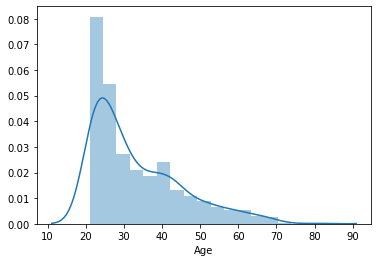

In [30]:
sns.distplot(diabetes_data["Age"])

In [31]:
q = diabetes_data["Age"].quantile(0.99)

In [32]:
adj_data1 = diabetes_data[diabetes_data["Age"] < q]

In [33]:
adj_data1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,3.831357,120.807642,69.110672,20.712780,80.666667,32.073254,0.471219,32.805007,0.350461
std,3.373499,31.913470,19.276378,15.917141,115.630420,7.809938,0.332522,11.113182,0.477429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,129.500000,36.600000,0.625000,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,66.000000,1.000000


<AxesSubplot:xlabel='Age'>

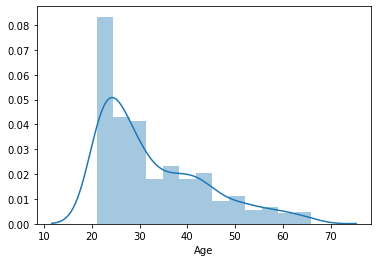

In [34]:
sns.distplot(adj_data1["Age"])

In [35]:
q = adj_data1["DiabetesPedigreeFunction"].quantile(0.99)

In [36]:
adj_data2 = adj_data1[adj_data1["DiabetesPedigreeFunction"] < q]

In [37]:
adj_data2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000
mean,3.860186,120.479361,69.135819,20.575233,79.402130,32.030626,0.454563,32.849534,0.348868
std,3.376057,31.706391,19.324187,15.840349,112.661739,7.667434,0.290857,11.141633,0.476930
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.240500,24.000000,0.000000
50%,3.000000,116.000000,72.000000,23.000000,36.000000,32.000000,0.365000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,128.500000,36.500000,0.611000,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,1.698000,66.000000,1.000000


<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

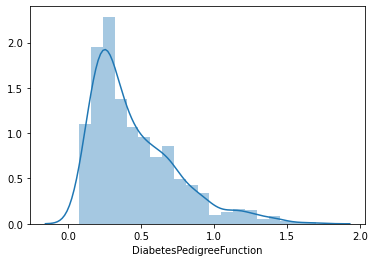

In [38]:
sns.distplot(adj_data2["DiabetesPedigreeFunction"])

In [39]:
q = diabetes_data["BMI"].quantile(0.99)

In [40]:
adj_data3 = adj_data2[adj_data2["BMI"] < q]

In [41]:
adj_data3.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.00000,744.000000,744.000000
mean,3.869624,120.380376,69.108871,20.483871,78.470430,31.807661,0.45391,32.903226,0.345430
std,3.370834,31.747730,19.056415,15.762871,110.768558,7.333050,0.29137,11.167092,0.475828
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.07800,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.24000,24.000000,0.000000
50%,3.000000,116.000000,72.000000,23.000000,34.000000,32.000000,0.36450,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.250000,36.300000,0.61050,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,50.000000,1.69800,66.000000,1.000000


<AxesSubplot:xlabel='BMI'>

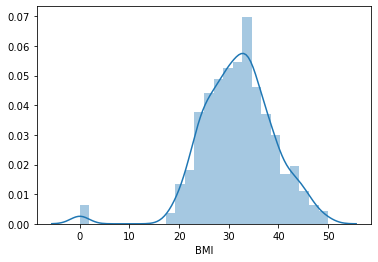

In [42]:
sns.distplot(adj_data3["BMI"])

In [43]:
q = adj_data3["Insulin"].quantile(0.99)

In [44]:
adj_data4 = adj_data3[adj_data3["Insulin"]< q]

In [45]:
adj_data4.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000
mean,3.869388,119.801361,69.100680,20.302041,72.420408,31.766531,0.453776,32.785034,0.338776
std,3.373131,31.416057,19.135347,15.735161,96.238387,7.344322,0.292296,11.082674,0.473616
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.000000,0.000000,0.000000,27.300000,0.240500,24.000000,0.000000
50%,3.000000,115.000000,72.000000,23.000000,23.000000,32.000000,0.364000,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,125.000000,36.250000,0.606000,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,485.000000,50.000000,1.698000,66.000000,1.000000


In [46]:
q = adj_data4["SkinThickness"].quantile(0.99)

In [47]:
adj_data5 = adj_data4[adj_data4["SkinThickness"] < q ]

In [48]:
adj_data5.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000
mean,3.891034,119.830345,68.990345,19.793103,72.259310,31.649655,0.453131,32.801379,0.340690
std,3.364256,31.379607,19.221913,15.137900,96.458786,7.303677,0.292618,11.068558,0.474268
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.200000,0.240000,24.000000,0.000000
50%,3.000000,116.000000,72.000000,22.000000,18.000000,32.000000,0.361000,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,125.000000,36.000000,0.605000,40.000000,1.000000
max,17.000000,199.000000,122.000000,49.000000,485.000000,50.000000,1.698000,66.000000,1.000000


In [49]:
q = adj_data5["BloodPressure"].quantile(0.99)

In [50]:
adj_data6 = adj_data5[adj_data5["BloodPressure"] < q]

In [51]:
adj_data6.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000
mean,3.847765,119.638268,68.474860,19.817039,72.441341,31.574441,0.454585,32.648045,0.339385
std,3.338357,31.242640,18.772191,15.108236,96.447983,7.267458,0.293318,10.990479,0.473832
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.100000,0.242500,24.000000,0.000000
50%,3.000000,115.000000,72.000000,22.000000,22.500000,31.900000,0.364000,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,125.000000,35.900000,0.605500,40.000000,1.000000
max,17.000000,199.000000,104.000000,49.000000,485.000000,50.000000,1.698000,66.000000,1.000000


In [52]:
q = adj_data6["Glucose"].quantile(0.99)

In [53]:
adj_data7 = adj_data6[adj_data6["Glucose"] < q]

In [54]:
adj_data7.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000
mean,3.837571,118.769774,68.403955,19.796610,71.920904,31.535876,0.451941,32.590395,0.331921
std,3.338160,30.323654,18.852681,15.082081,95.956110,7.267168,0.290789,10.965370,0.471236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.100000,0.240750,24.000000,0.000000
50%,3.000000,115.000000,71.000000,22.000000,22.500000,31.750000,0.361500,29.000000,0.000000
75%,6.000000,138.000000,80.000000,32.000000,122.000000,35.800000,0.602000,40.000000,1.000000
max,17.000000,194.000000,104.000000,49.000000,485.000000,50.000000,1.698000,66.000000,1.000000


In [55]:
q = adj_data7["Pregnancies"].quantile(0.99)

In [56]:
adj_data8 = adj_data7[adj_data7["Pregnancies"] < q]

In [57]:
adj_data8.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,3.668103,118.568966,68.385057,19.783046,72.173851,31.477155,0.451411,32.390805,0.326149
std,3.100785,30.321460,18.770435,15.075266,96.372822,7.274244,0.290654,10.929184,0.469140
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.100000,0.240750,24.000000,0.000000
50%,3.000000,115.000000,70.000000,22.000000,22.500000,31.600000,0.361000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,122.750000,35.800000,0.602000,39.000000,1.000000
max,12.000000,194.000000,104.000000,49.000000,485.000000,50.000000,1.698000,66.000000,1.000000


<AxesSubplot:xlabel='Age'>

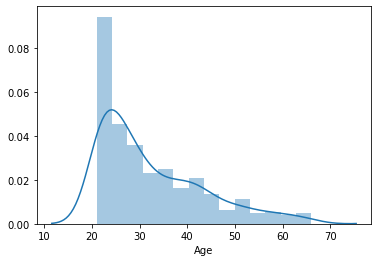

In [58]:
sns.distplot(adj_data8["Age"])

In [59]:
data_cleaned = adj_data8.reset_index(drop = True)

In [60]:
#writing a function to check for outliers
def showOutliers(column):
    outliers = []
    Q1 = column.quantile(.25)
    Q3 = column.quantile(.75)
    IQR = Q3-Q1
    lower_limits = Q1-(1.5 * IQR)
    upper_limits = Q3+(1.5 * IQR)
    
    for out in column:
        if out < lower_limits or out > upper_limits:
            outliers.append(out)
    return np.array(outliers)
    
    

In [61]:
#verify the outliers
print(len(showOutliers(data_cleaned["BMI"])))
print(len(showOutliers(data_cleaned["Glucose"])))
print(len(showOutliers(data_cleaned["Age"])))
print(len(showOutliers(data_cleaned["Insulin"])))
print(len(showOutliers(data_cleaned["Pregnancies"])))
print(len(showOutliers(data_cleaned["DiabetesPedigreeFunction"])))
print(len(showOutliers(data_cleaned["BloodPressure"])))
print(len(showOutliers(data_cleaned["SkinThickness"])))


12
5
14
24
0
26
34
0


<AxesSubplot:xlabel='Age'>

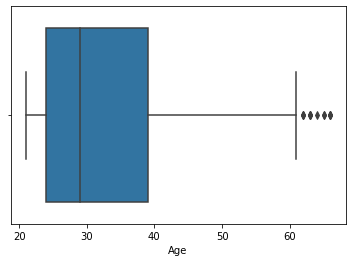

In [62]:
#visualizingo the outliers
sns.boxplot(data_cleaned.Age)


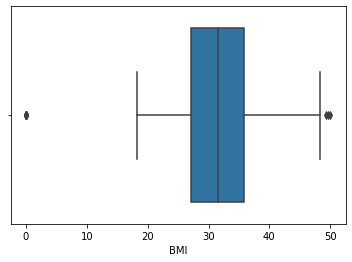

In [63]:
sns.boxplot(data_cleaned.BMI)
plt.figsize = (20,10)

In [64]:
#removing the outliers

def removeOutliers(column):
    sorted(column)
    Q1,Q3 = column.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_limits = Q1-(1.5*IQR)
    upper_limits = Q3+(1.5* IQR)
    return lower_limits , upper_limits


In [65]:
low_Age,high_Age = removeOutliers(data_cleaned.Age)
data_cleaned.Age=np.where(data_cleaned.Age > high_Age , high_Age ,data_cleaned.Age)
data_cleaned.Age=np.where(data_cleaned.Age < low_Age , low_Age ,data_cleaned.Age)

In [66]:
low_Glucose,high_Glucose = removeOutliers(data_cleaned.Glucose)
data_cleaned.Glucose=np.where(data_cleaned.Glucose > high_Glucose , high_Glucose ,data_cleaned.Glucose)
data_cleaned.Glucose=np.where(data_cleaned.Glucose < low_Glucose , low_Glucose ,data_cleaned.Glucose)

In [67]:
low_SkinThickness,high_SkinThickness = removeOutliers(data_cleaned.SkinThickness)
data_cleaned.SkinThickness=np.where(data_cleaned.SkinThickness > high_SkinThickness , high_SkinThickness ,data_cleaned.SkinThickness)
data_cleaned.SkinThickness=np.where(data_cleaned.SkinThickness < low_SkinThickness , low_SkinThickness ,data_cleaned.SkinThickness)

In [68]:
low_BloodPressure,high_BloodPressure = removeOutliers(data_cleaned.BloodPressure)
data_cleaned.BloodPressure=np.where(data_cleaned.BloodPressure > high_BloodPressure , high_BloodPressure ,data_cleaned.BloodPressure)
data_cleaned.BloodPressure=np.where(data_cleaned.BloodPressure < low_BloodPressure , low_BloodPressure ,data_cleaned.BloodPressure)

In [69]:
low_BMI,high_BMI = removeOutliers(data_cleaned.BMI)
data_cleaned.BMI=np.where(data_cleaned.BMI > high_BMI , high_BMI ,data_cleaned.BMI)
data_cleaned.BMI=np.where(data_cleaned.BMI < low_BMI , low_BMI ,data_cleaned.BMI)

In [70]:
low_DiabetesPedigreeFunction,high_DiabetesPedigreeFunction = removeOutliers(data_cleaned.DiabetesPedigreeFunction)
data_cleaned.DiabetesPedigreeFunction=np.where(data_cleaned.DiabetesPedigreeFunction > high_DiabetesPedigreeFunction , high_DiabetesPedigreeFunction ,data_cleaned.DiabetesPedigreeFunction)
data_cleaned.DiabetesPedigreeFunction=np.where(data_cleaned.DiabetesPedigreeFunction < low_DiabetesPedigreeFunction , low_DiabetesPedigreeFunction ,data_cleaned.DiabetesPedigreeFunction)

In [71]:
low_Pregnancies,high_Pregnancies = removeOutliers(data_cleaned.Pregnancies)
data_cleaned.Pregnancies =np.where(data_cleaned.Pregnancies > high_Pregnancies , high_Pregnancies ,data_cleaned.Pregnancies)
data_cleaned.Pregnancies=np.where(data_cleaned.Pregnancies < low_Pregnancies , low_Pregnancies ,data_cleaned.Pregnancies)

In [72]:
low_Insulin,high_Insulin = removeOutliers(data_cleaned.Insulin)
data_cleaned.Insulin =np.where(data_cleaned.Insulin > high_Insulin , high_Insulin ,data_cleaned.Insulin)
data_cleaned.Insulin=np.where(data_cleaned.Insulin < low_Insulin , low_Insulin ,data_cleaned.Insulin)

<AxesSubplot:xlabel='Pregnancies'>

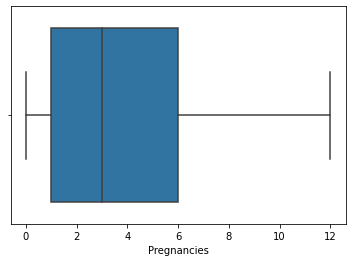

In [73]:
sns.boxplot(data_cleaned.Pregnancies)

In [74]:
data_cleaned.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,696.000000,696.000000,696.000000,696.000000,696.000000,696.00000,696.000000,696.000000,696.000000
mean,3.668103,118.870690,70.017241,19.783046,69.647989,31.65546,0.445186,32.340517,0.326149
std,3.100785,29.331505,13.561360,15.075266,88.212971,6.62303,0.272137,10.786002,0.469140
min,0.000000,42.000000,35.000000,0.000000,0.000000,14.05000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.10000,0.240750,24.000000,0.000000
50%,3.000000,115.000000,70.000000,22.000000,22.500000,31.60000,0.361000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,122.750000,35.80000,0.602000,39.000000,1.000000
max,12.000000,194.000000,104.000000,49.000000,306.875000,48.85000,1.143875,61.500000,1.000000


<AxesSubplot:>

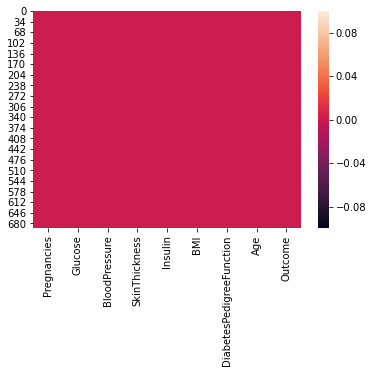

In [75]:
#checks for missing values
sns.heatmap(data_cleaned.isnull())

In [76]:
#checking the individual counts per each varible

data_cleaned.Outcome.value_counts()

0    469
1    227
Name: Outcome, dtype: int64

In [77]:
#bring back the information on the data
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               696 non-null    float64
 1   Glucose                   696 non-null    float64
 2   BloodPressure             696 non-null    float64
 3   SkinThickness             696 non-null    float64
 4   Insulin                   696 non-null    float64
 5   BMI                       696 non-null    float64
 6   DiabetesPedigreeFunction  696 non-null    float64
 7   Age                       696 non-null    float64
 8   Outcome                   696 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 49.1 KB


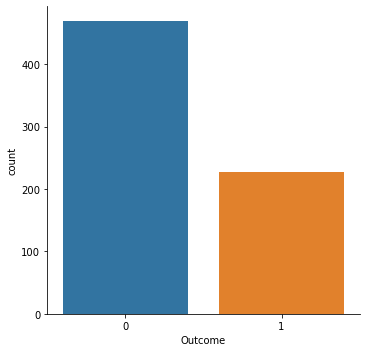

In [78]:
sns.catplot('Outcome' , data = data_cleaned , kind = 'count')


<AxesSubplot:xlabel='Age', ylabel='Glucose'>

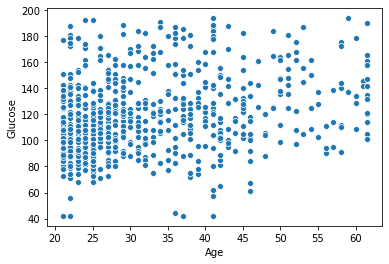

In [79]:
#getting a relationship between variables
sns.scatterplot(data_cleaned.Age , data_cleaned.Glucose , data = data_cleaned )


<AxesSubplot:xlabel='Insulin', ylabel='Glucose'>

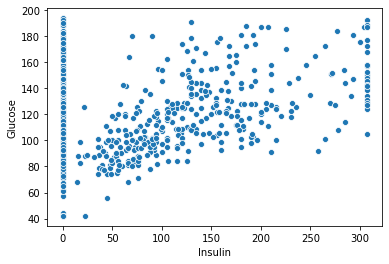

In [80]:
#getting a relationship between variables
sns.scatterplot(data_cleaned.Insulin , data_cleaned.Glucose , data = data_cleaned )


<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>

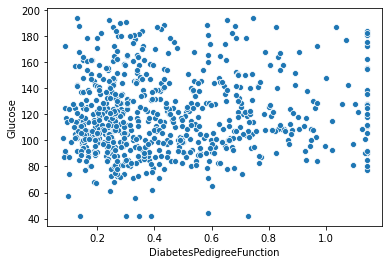

In [81]:
sns.scatterplot(data_cleaned.DiabetesPedigreeFunction , data_cleaned.Glucose , data = data_cleaned )


<AxesSubplot:xlabel='BMI', ylabel='SkinThickness'>

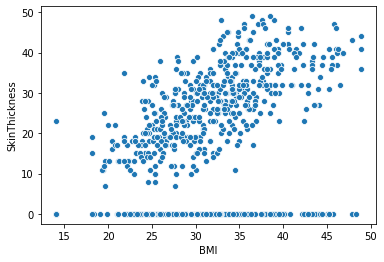

In [82]:
sns.scatterplot(data_cleaned.BMI , data_cleaned.SkinThickness , data = data_cleaned)

<AxesSubplot:>

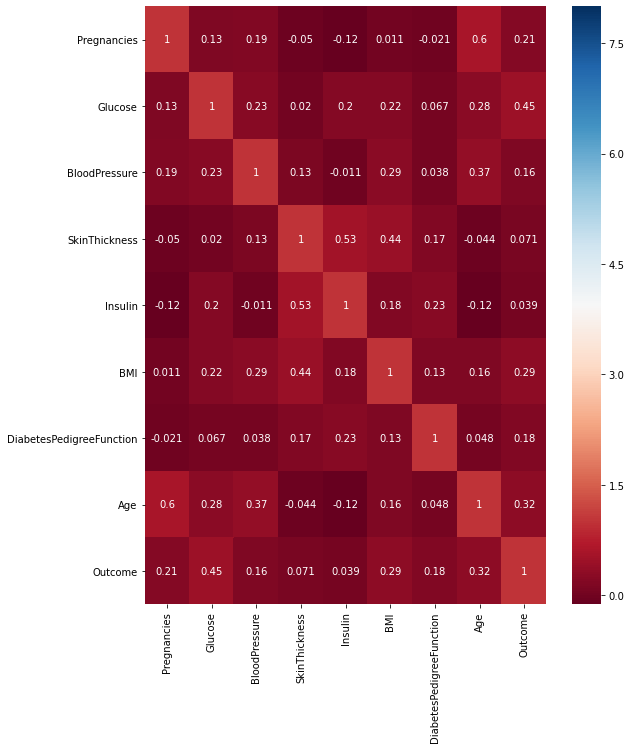

In [83]:
corr = data_cleaned.corr(method = 'spearman')
plt.figure(figsize = (9,11))
sns.heatmap(corr , vmax = 8 , cmap = 'RdBu', annot = True  )

<Figure size 1008x360 with 0 Axes>

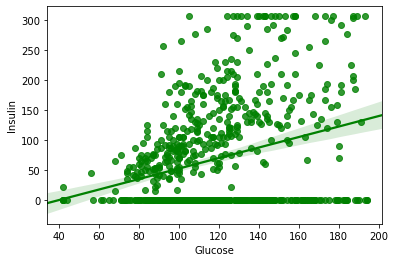

<Figure size 1008x360 with 0 Axes>

In [84]:
#get the regression analysis between insulin
sns.regplot(x = data_cleaned.Glucose , y = data_cleaned.Insulin , data = data_cleaned  , color= 'g')
plt.figure(figsize = (14 , 5))

<AxesSubplot:xlabel='Age', ylabel='Glucose'>

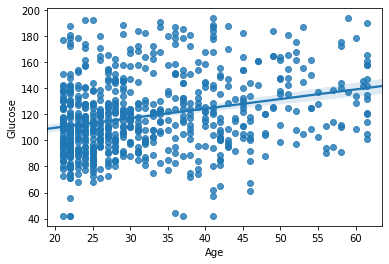

In [85]:
#get the regression analysis between age and glucose
sns.regplot(x = data_cleaned.Age , y = data_cleaned.Glucose)

SpearmanrResult(correlation=-0.11525709298317743, pvalue=0.0023238651984599495)


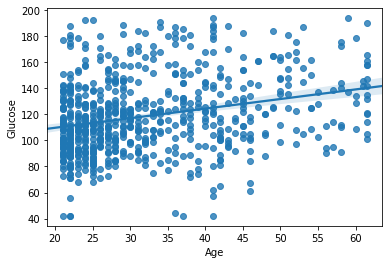

In [86]:
#checking the relationship between using the correlation scheme 
sns.regplot(x = data_cleaned.Age , y = data_cleaned.Glucose)
print(spearmanr(data_cleaned.Insulin  , data_cleaned.Age))


<AxesSubplot:xlabel='Outcome', ylabel='Age'>

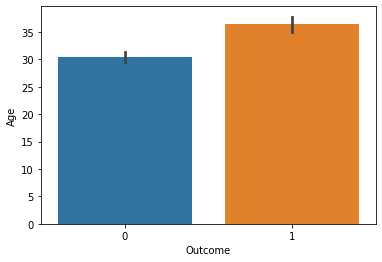

In [87]:
#bivariate analysis between a categorical and numeric

sns.barplot(x = data_cleaned.Outcome, y  = data_cleaned.Age)